In [14]:
import io
import zipfile
import pandas as pd
import pprint
import seaborn as sns

pp = pprint.PrettyPrinter(indent=4).pprint

data_file_path = '../data/ibm-hr-analytics-attrition-dataset.zip'
encoding = 'utf-8-sig'


data = []
with zipfile.ZipFile(data_file_path) as zfile:
    for name in zfile.namelist():
        with zfile.open(name) as readfile:
            for line in io.TextIOWrapper(readfile, encoding):
                data.append(line.replace('\n', '').split(','))

labels=['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 
       'DistanceFromHome', 'Education', 'EducationField', 'EducationField'
       "EmployeeCount","EmployeeNumber","EnvironmentSatisfaction","Gender","HourlyRate","JobInvolvement",
       "JobLevel","JobRole","JobSatisfaction","MaritalStatus","MonthlyIncome","MonthlyRate","NumCompaniesWorked",
       "Over18","OverTime","PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StandardHours",
       "StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany",
       "YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"
      ]

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
attrition_df = pd.DataFrame(data, columns=labels)
attrition_df = attrition_df.drop([0])


attrition_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EducationFieldEmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
7,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
8,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
9,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
10,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [15]:
#convert categorical data to be numerical strings
#convert to float values
#PRE-CATEGORIZED
pre_categorized_data = ["Education",
"EnvironmentSatisfaction",
"JobInvolvement",
"JobSatisfaction",
"PerformanceRating",
"RelationshipSatisfaction",
"WorkLifeBalance", 
"Gender",
"JobRole",
                        "StockOptionLevel"
]

# NOT CATEGORIZED CATEGORICAL DATA
post_categorical_data = [
    "Attrition",
    "BusinessTravel",
    "Department",
    "EducationField",
    "Gender",
    "JobRole",
    "MaritalStatus",
    "OverTime"
]


## CHANGING CATEGORICAL DATA TO NUMBERS
# VERSION 1
# categorical_data_values_count = {}
# for data in not_categorical_data:
#     #get counts for data
#     categorical_data_values_count[data] = attrition_df[data].value_counts()
#     #change data to number
#     attrition_df[data] = attrition_df[data].factorize()[0]
    
#VERSION 2
attrition_df["Attrition"] = attrition_df.Attrition.map({"Yes": 1, "No": 0})
attrition_df["BusinessTravel"] = attrition_df.BusinessTravel.map({"Travel_Rarely": 1, "Travel_Frequently": 2, "Non-Travel": 0})
attrition_df["Department"] = attrition_df.Department.map({"Sales": 0, "Research & Development": 1, "Human Resources": 2})
attrition_df["EducationField"] = attrition_df.EducationField.map({'Life Sciences': 0, 'Other': 1, 'Medical': 2, 'Marketing': 3, 'Technical Degree': 4,
 'Human Resources': 5})
attrition_df["Gender"] = attrition_df.Gender.map({"Male": 0, "Female": 1})
attrition_df["JobRole"] = attrition_df.JobRole.map({'Sales Executive': 0, 'Research Scientist': 1,
    'Laboratory Technician': 2, 'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5,
 'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8})
attrition_df["MaritalStatus"] = attrition_df.MaritalStatus.map({'Single': 0, 'Married': 1, 'Divorced': 2})
attrition_df["OverTime"] = attrition_df.OverTime.map({"Yes": 1, "No": 0})
attrition_df["Over18"] = attrition_df.Over18.map({"Y": 1, "N": 0})


In [17]:
#convert to float values
for series in attrition_df.columns:
    attrition_df[series] = attrition_df[series].astype(float)
    

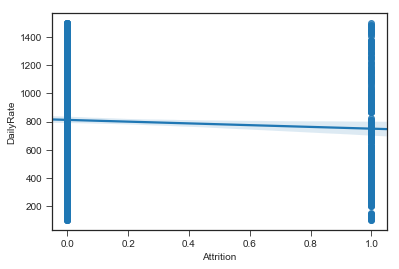

In [18]:
sns.regplot(x=attrition_df['Attrition'], y=attrition_df["DailyRate"], data=attrition_df)


NameError: name 'plt' is not defined

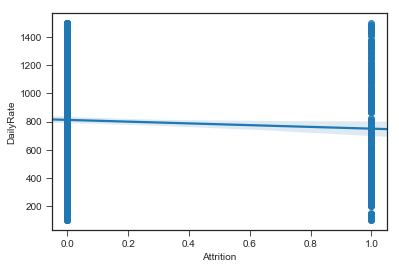

In [20]:
# sns.set_style('ticks')

sns.regplot(x=attrition_df['Attrition'], y=attrition_df["DailyRate"], data=attrition_df)

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.regplot(data[:,0], data[:,1], ax=ax)
sns.despine()
